# GHZ and W States

In [1]:
from numpy import pi

In [2]:
# Importing standard Qiskit libraries

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_distribution
from qiskit import transpile
from qiskit_ibm_runtime import SamplerV2 as Sampler, QiskitRuntimeService
from qiskit_ibm_runtime.fake_provider import *
from qiskit_aer import AerSimulator

In [3]:
import mthree

In [4]:
# Descomente la siguiente linea si desea ver las imágenes más grandes.
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

In [5]:
backend_simulator = AerSimulator()
backend_device = FakeBogotaV2()

# Circuit for a GHZ State:

In [6]:
nqubits = 3
circuit = QuantumCircuit(nqubits, nqubits)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2], [0,1,2])

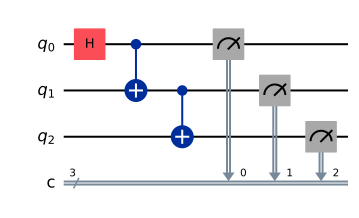

In [7]:
circuit.draw(output='mpl')

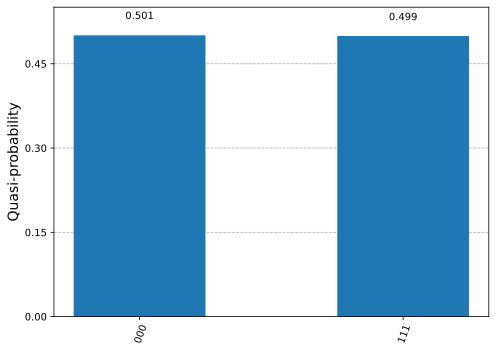

In [8]:
shots = 8192
sim_result = backend_simulator.run((circuit), shots=shots).result()
sim_counts = sim_result.get_counts(circuit)

plot_distribution(sim_counts)

In [9]:
transpiled_circuit = transpile(circuit, backend_device)

In [10]:
sampler2run = Sampler(mode=backend_device)

In [11]:
# Define the number of shots for the execution. 
shotno=1024

# Run the circuit on a real quantum computer. NB! This may take a while.
job = sampler2run.run([transpiled_circuit], shots= shotno)

# ID del Job para rastrear la ejecución del circuito en tiempo real.
print(f">>> Job ID: {job.job_id()}")

# Consulta del estado de la ejecución del circuito cuántico
print(f">>> Job Status: {job.status()}")

>>> Job ID: 4b2611fb-37be-45ef-85b1-7a59081d0cf7
>>> Job Status: JobStatus.RUNNING


In [12]:
device_result = job.result()

# Get results for the first (and only) PUB
pub_result = device_result[0]

# Get count measurement results
device_counts = pub_result.data.c.get_counts()

print(
    f"Counts for the 'meas' output register: {device_counts}"
)

Counts for the 'meas' output register: {'011': 23, '010': 18, '111': 436, '000': 464, '100': 16, '001': 14, '110': 27, '101': 26}


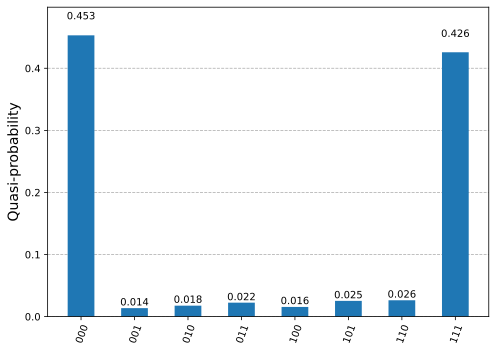

In [13]:
# Probabilidades de medición de cada salida, dada la ejecución real realizada.
plot_distribution(device_counts)

In [14]:
# plot_distribution([sim_counts, device_counts], 
#                legend=['Simulator: Ideal', 'Device: Noise'])

In [15]:
mit = mthree.M3Mitigation(backend_device)
mit.cals_from_system(range(circuit.num_qubits))

mitigate_quasi = mit.apply_correction(device_counts, range(circuit.num_qubits))
mitigate_probs = mitigate_quasi.nearest_probability_distribution()

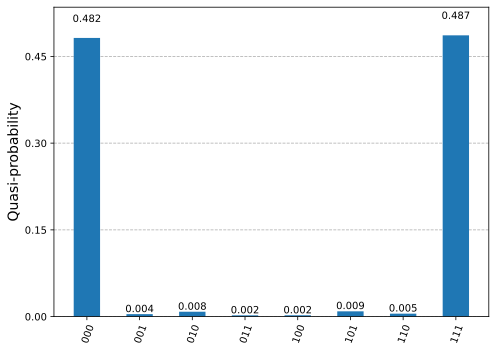

In [16]:
plot_distribution(mitigate_probs)

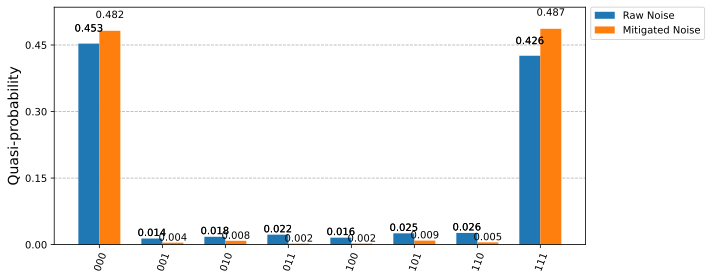

In [17]:
plot_distribution([device_counts, mitigate_probs], figsize=(10,4), legend=['Raw Noise', 'Mitigated Noise'])

# Circuit for a W State:

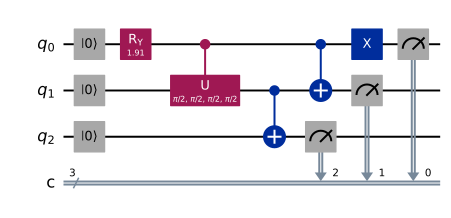

In [18]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit2 = QuantumCircuit(qreg_q, creg_c)

circuit2.reset(qreg_q[0])
circuit2.reset(qreg_q[1])
circuit2.reset(qreg_q[2])
circuit2.ry(1.9106332362490184, qreg_q[0])
circuit2.cu(pi / 2, pi / 2, pi / 2, pi / 2, qreg_q[0], qreg_q[1])
circuit2.cx(qreg_q[1], qreg_q[2])
circuit2.cx(qreg_q[0], qreg_q[1])
circuit2.x(qreg_q[0])
circuit2.measure(qreg_q[0], creg_c[0])
circuit2.measure(qreg_q[1], creg_c[1])
circuit2.measure(qreg_q[2], creg_c[2])

circuit2.draw(output='mpl')

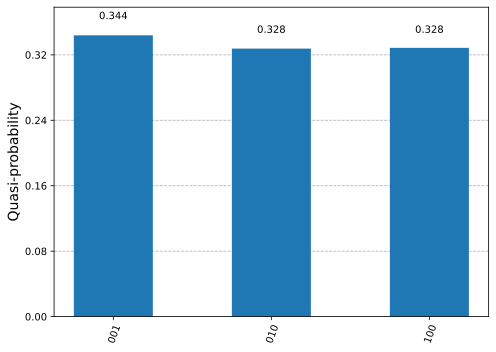

In [19]:
shots = 8192
sim_result2 = backend_simulator.run((circuit2), shots=shots).result()
sim_counts2 = sim_result2.get_counts(circuit2)

# Simulating the circuit and plotting the corresponding histogram:
plot_distribution(sim_counts2)

In [20]:
transpiled_circuit2 = transpile(circuit2, backend_device)
# transpiled_circuit.draw('mpl', style="iqp")
# plt.show()

In [21]:
# Define the number of shots for the execution. 
shotno=1024

# Run the circuit on a real quantum computer. NB! This may take a while.
job2 = sampler2run.run([transpiled_circuit2], shots= shotno)

# ID del Job para rastrear la ejecución del circuito en tiempo real.
print(f">>> Job ID: {job2.job_id()}")

# Consulta del estado de la ejecución del circuito cuántico
print(f">>> Job Status: {job2.status()}")

>>> Job ID: 70690d0b-fc74-42d4-86a9-7b7228699e2e
>>> Job Status: JobStatus.RUNNING


Counts for the 'meas' output register: {'010': 305, '001': 313, '100': 297, '011': 14, '101': 19, '000': 57, '110': 18, '111': 1}


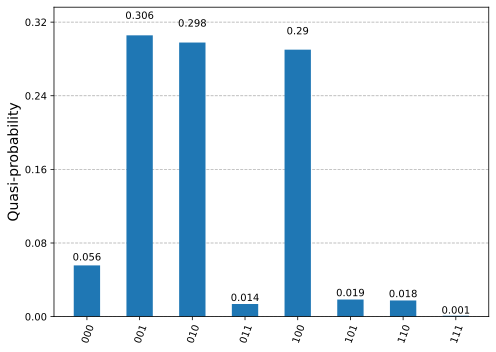

In [22]:
device_result2 = job2.result()

# Get results for the first (and only) PUB
pub_result2 = device_result2[0]

# Get count measurement results
device_counts2 = pub_result2.data.c.get_counts()

print(
    f"Counts for the 'meas' output register: {device_counts2}")

plot_distribution(device_counts2)

In [23]:
# plot_distribution([sim_counts2, device_counts2], 
#                legend=['Simulator: Ideal', 'Device: Noise'])

In [24]:
mit.cals_from_system(range(circuit2.num_qubits))

mitigate_quasi2 = mit.apply_correction(device_counts2, range(circuit2.num_qubits))
mitigate_probs2 = mitigate_quasi2.nearest_probability_distribution()

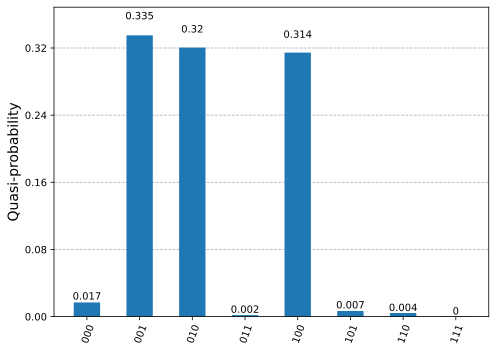

In [25]:
plot_distribution(mitigate_probs2)

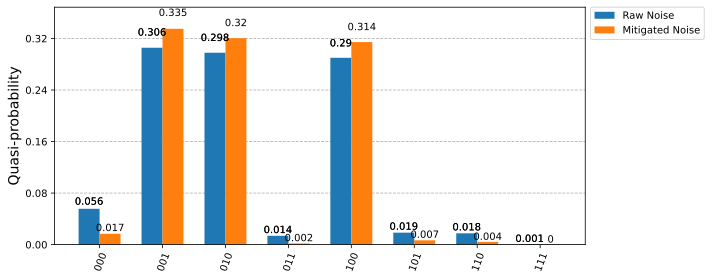

In [26]:
plot_distribution([device_counts2, mitigate_probs2], figsize=(10,4), legend=['Raw Noise', 'Mitigated Noise'])

In [27]:
from qiskit import __version__ as qiskit_version
from qiskit_ibm_runtime import __version__ as runtime_version
from qiskit_aer import __version__ as aer_version
from platform import python_version

print('Qiskit Version:', qiskit_version)
print('IBM RunTime Version:', runtime_version)
print('Qiskit_Aer Version:', aer_version)
print('Python Version:', python_version())
print('2025 ©')

Qiskit Version: 2.0.0
IBM RunTime Version: 0.37.0
Qiskit_Aer Version: 0.17.0
Python Version: 3.13.2
2025 ©
